# Core problems of Data

* Missing data
* Incorrect data
* Extreme values (outliers)
* Wrong data type
* Text cleaning
* Duplicates
* Low variance data

In [1]:
# relocate myself to the file
import os
os.chdir('/Users/Jeff/Downloads/vehicles')

In [2]:
import pandas as pd
df=pd.read_csv('vehicles_messy.csv')

/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(37843, 83)

So, we have 83 columns and 37843 observations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

In [5]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [6]:
df.sample(5)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
23595,17.347895,0.00,0.0,0.0,17,16.6628,0,0.0,0.0,0.0,...,FMX,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
21373,23.543571,6.81,0.0,0.0,13,0.0000,10,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
15203,21.974000,0.00,0.0,0.0,13,0.0000,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
16223,14.330870,0.00,0.0,0.0,21,0.0000,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
18181,14.982273,0.00,0.0,0.0,19,0.0000,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [8]:
# description of data
df.describe()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,UCity,UCityA,UHighway,UHighwayA,year,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,37843.000000,37843.000000,37843.0,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,...,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000,37843.000000
mean,17.532506,0.216169,0.0,0.023531,17.941389,4.042737,0.520149,0.327163,0.000406,0.184790,...,22.587229,0.652380,33.619221,0.933845,2000.064398,-2658.999022,0.004360,0.069313,0.068203,0.068573
std,4.575950,1.141527,0.0,0.427647,6.660360,9.645820,3.837874,3.542596,0.039918,2.904558,...,9.350163,5.284547,10.048326,6.059456,10.390588,2553.098329,0.142776,1.966806,1.871986,1.913647
min,0.060000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1984.000000,-22250.000000,0.000000,0.000000,0.000000,0.000000
25%,14.330870,0.000000,0.0,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.000000,0.000000,27.100000,0.000000,1990.000000,-4250.000000,0.000000,0.000000,0.000000,0.000000
50%,17.347895,0.000000,0.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,21.000000,0.000000,33.000000,0.000000,2001.000000,-2500.000000,0.000000,0.000000,0.000000,0.000000
75%,20.600625,0.000000,0.0,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.139300,0.000000,38.109600,0.000000,2009.000000,-750.000000,0.000000,0.000000,0.000000,0.000000
max,47.087143,18.311667,0.0,12.000000,138.000000,138.304000,127.000000,127.093000,5.350000,122.000000,...,197.577100,181.560900,159.100000,152.187800,2017.000000,4000.000000,7.000000,97.000000,79.000000,88.000000


In [11]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

After seeing the result the outputs of these tables we can conclude:
1. 37843 rows and 83 columns. Enough data, but too much columns probably. Could be useful to drop some.
2. head() or sample() showed us that we have lots of missing values, zeros, different data types (such as datatime)
3. describe() showed us that we have lots of columns with 75% of data being 0. Not good
4. lots of columns start similarly. They probably describe the same info. Could be dummied. Not sure

1. Data - to make data be friendly
2. Logic - Reach the goal of analysis
3. Interface - Make the results be friendly

# 2. Missing data

How do we deal with missing data?
1. Detext the missing arte in each column
2. Select the solution:
    * Drop column with missing rate higher than thershold
    * Drop the row
    * Interpolate
    * Null the value and create a flag column
3. No more missing value. PROFIT!

## 2.1 Fillna

In [19]:
# What columns have missing values?
missing_data=(df.isna().sum()/df.shape[0]*100).round(2)

missing_data[missing_data>0]

cylinders      0.33
displ          0.32
drive          3.14
eng_dscr      40.70
trany          0.03
guzzler       93.97
trans_dscr    60.24
tCharger      86.30
sCharger      98.24
atvType       91.88
fuelType2     96.28
rangeA        96.29
evMotor       98.51
mfrCode       81.44
c240Dscr      99.90
c240bDscr     99.90
startStop     83.78
dtype: float64

In [20]:
df.c240bDscr[df.c240bDscr.notna()]

25683           dual charger
25684           dual charger
25895         6.6 kW charger
25955           dual charger
27142         6.6 kW charger
27226    80 amp dual charger
27227    80 amp dual charger
27384         6.6 kW charger
28560    80 amp dual charger
28575    80 amp dual charger
28591    80 amp dual charger
28592    80 amp dual charger
28600    80 amp dual charger
28720    80 amp dual charger
29443    80 amp dual charger
29444    80 amp dual charger
29497         3.6 kW charger
29652    80 amp dual charger
29654    80 amp dual charger
29750         6.6 kW charger
29933    80 amp dual charger
29934    80 amp dual charger
29935    80 amp dual charger
29936    80 amp dual charger
29938    80 amp dual charger
29939    80 amp dual charger
29941    80 amp dual charger
29942    80 amp dual charger
29943    80 amp dual charger
30141    80 amp dual charger
30142    80 amp dual charger
30143    80 amp dual charger
30972    80 amp dual charger
30973    80 amp dual charger
30974    80 am

In [21]:
df.make[df.c240Dscr.notna()]

25683         Tesla
25684         Tesla
25895        Nissan
25955         Tesla
27142        Nissan
27226         Tesla
27227         Tesla
27384        Nissan
28560         Tesla
28575         Tesla
28591         Tesla
28592         Tesla
28600         Tesla
28720         Tesla
29443         Tesla
29444         Tesla
29497    Volkswagen
29652         Tesla
29654         Tesla
29750        Nissan
29751        Nissan
29933         Tesla
29934         Tesla
29935         Tesla
29936         Tesla
29938         Tesla
29939         Tesla
29941         Tesla
29942         Tesla
29943         Tesla
30141         Tesla
30142         Tesla
30143         Tesla
30972         Tesla
30973         Tesla
30974         Tesla
30975         Tesla
Name: make, dtype: object

In [25]:
df[['make','model']][df.c240Dscr.notna()]

,make,model
25683,Tesla,Model S (60 kW-hr battery pack)
25684,Tesla,Model S (85 kW-hr battery pack)
25895,Nissan,Leaf
25955,Tesla,Model S (40 kW-hr battery pack)
27142,Nissan,Leaf
27226,Tesla,Model S (85 kW-hr battery pack)
27227,Tesla,Model S (60 kW-hr battery pack)
27384,Nissan,Leaf
28560,Tesla,Model S (85 kW-hr battery pack)
28575,Tesla,Model S AWD (85 kW-hr battery pack)


In [26]:
df[['c240Dscr','c240bDscr']]=df[['c240Dscr','c240bDscr']].fillna('Not Applicable')

In [27]:
# What columns have missing values?
missing_data=(df.isna().sum()/df.shape[0]*100).round(2)

missing_data[missing_data>0]

cylinders      0.33
displ          0.32
drive          3.14
eng_dscr      40.70
trany          0.03
guzzler       93.97
trans_dscr    60.24
tCharger      86.30
sCharger      98.24
atvType       91.88
fuelType2     96.28
rangeA        96.29
evMotor       98.51
mfrCode       81.44
startStop     83.78
dtype: float64

In [28]:
df.tCharger.unique()

array([nan, 'T'], dtype=object)

In [29]:
df.sCharger.unique()

array([nan, 'S'], dtype=object)

In [31]:
df[['tCharger','sCharger']].isna().sum(axis=1).unique()

array([2, 1, 0])

## 2.2 Drop based on threshold

This approach is harsh, you lose a lot of data (taht you actually paid for), it is highly not recommended. But why not?

In [33]:
# What columns have missing values?
missing_data=(df.isna().sum()/df.shape[0]*100).round(2)

missing_data[missing_data>0]

cylinders      0.33
displ          0.32
drive          3.14
eng_dscr      40.70
trany          0.03
guzzler       93.97
trans_dscr    60.24
tCharger      86.30
sCharger      98.24
atvType       91.88
fuelType2     96.28
rangeA        96.29
evMotor       98.51
mfrCode       81.44
startStop     83.78
dtype: float64

I need to define the thershold level.

In [37]:
threshold=70

columns_to_drop=missing_data[missing_data>threshold].index

In [40]:
df1=df.drop(columns_to_drop, axis=1).copy()

In [42]:
df1.shape

(37843, 74)

## 2.3 Interpolation

In [43]:
data_numeric=df1._get_numeric_data()

In [48]:
# What columns have missing values?
missing_data=(data_numeric.isna().sum()/data_numeric.shape[0]*100).round(2)

cols_to_interpolate=missing_data[missing_data>0].index

In [49]:
data_numeric[cols_to_interpolate].interpolate(method='linear')

,cylinders,displ
0,4.0,2.0
1,12.0,4.9
2,4.0,2.2
3,8.0,5.2
4,4.0,2.2
...,...,...
37838,4.0,2.2
37839,4.0,2.2
37840,4.0,2.2
37841,4.0,2.2


In [54]:
missing_data=(df1.isna().sum()/df1.shape[0]*100).round(2)

missing_data[missing_data>0]

cylinders      0.33
displ          0.32
drive          3.14
eng_dscr      40.70
trany          0.03
trans_dscr    60.24
dtype: float64

In [53]:
df1.drive

0                  Rear-Wheel Drive
1                  Rear-Wheel Drive
2                 Front-Wheel Drive
3                  Rear-Wheel Drive
4        4-Wheel or All-Wheel Drive
                    ...            
37838             Front-Wheel Drive
37839             Front-Wheel Drive
37840    4-Wheel or All-Wheel Drive
37841    4-Wheel or All-Wheel Drive
37842    4-Wheel or All-Wheel Drive
Name: drive, Length: 37843, dtype: object

What can be done here?
1. Fillna with 'Unknown'
2. Randomly select the value from the list of values based on probability of having the value
3. bfill, ffill
4. fillna with the mode (most common value)

In [55]:
df.drive.value_counts()

Front-Wheel Drive             13286
Rear-Wheel Drive              12931
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2057
4-Wheel Drive                  1065
2-Wheel Drive                   507
Part-time 4-Wheel Drive         159
2-Wheel Drive, Front              1
Name: drive, dtype: int64

In [59]:
df1.drive.fillna(df.drive.mode()[0], inplace=True)

In [61]:
missing_data=(df1.isna().sum()/df1.shape[0]*100).round(2)

missing_data[missing_data>0].index

Index(['cylinders', 'displ', 'eng_dscr', 'trany', 'trans_dscr'], dtype='object')

In [64]:
df1[missing_data[missing_data>0].index].fillna('missing', inplace=True)

/usr/local/Cellar/jupyterlab/2.2.0/libexec/lib/python3.8/site-packages/pandas/core/frame.py:4314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [65]:
missing_data=(df1.isna().sum()/df1.shape[0]*100).round(2)

missing_data[missing_data>0]

cylinders      0.33
displ          0.32
eng_dscr      40.70
trany          0.03
trans_dscr    60.24
dtype: float64

In [66]:
df1[missing_data[missing_data>0].index]=df1[missing_data[missing_data>0].index].fillna('missing')

In [67]:
missing_data=(df1.isna().sum()/df1.shape[0]*100).round(2)

missing_data[missing_data>0]

Series([], dtype: float64)

** No more missing values! PROFIT!

# 3. Incorrect data

1. Define all possible errors
2. Write down the rules that will allow you to detect those errors
3. For rules in rules:
    * Search for mistake
    * If a mistake is found and can be fixed:
        * Define the rule to fix the error
        * Correct them
    * Else:
        * First check for other mistakes. May be this value is just an outlier
        * If everything else is ok - try to access the true data (get the questionnaire for survey, call the respondent, etc.)
        * If actual data is unknown and/or unreachable - drop the row

In [69]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

I know that there can't be a car with a certain displacement and without cyclinders

In [79]:
df.loc[((df.cylinders.isna()) | (df.cylinders==0))&((df.displ!=0) | (df.displ.notna()))]

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
7138,0.240,0.0,0.0,0.0,81,0.0000,0,0.0,0.0,41.0000,...,NaN,Not Applicable,0.00,Not Applicable,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
7139,0.282,0.0,0.0,0.0,81,0.0000,0,0.0,0.0,41.0000,...,NaN,Not Applicable,0.00,Not Applicable,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
8143,0.282,0.0,0.0,0.0,81,0.0000,0,0.0,0.0,41.0000,...,NaN,Not Applicable,0.00,Not Applicable,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
8144,0.312,0.0,0.0,0.0,74,0.0000,0,0.0,0.0,46.0000,...,NaN,Not Applicable,0.00,Not Applicable,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
8146,0.522,0.0,0.0,0.0,45,0.0000,0,0.0,0.0,75.0000,...,NaN,Not Applicable,0.00,Not Applicable,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,N,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30969,0.192,0.0,0.0,4.0,120,119.6000,0,0.0,0.0,28.1744,...,KMX,Not Applicable,0.00,Not Applicable,Tue Sep 13 00:00:00 EDT 2016,Tue Sep 13 00:00:00 EDT 2016,N,0,0,0
30972,0.204,0.0,0.0,10.0,98,97.5636,0,0.0,0.0,35.0000,...,TSL,standard charger,3.75,80 amp dual charger,Tue Sep 13 00:00:00 EDT 2016,Tue Sep 13 00:00:00 EDT 2016,N,0,0,0
30973,0.192,0.0,0.0,12.0,101,101.4750,0,0.0,0.0,33.0000,...,TSL,standard charger,3.75,80 amp dual charger,Tue Sep 13 00:00:00 EDT 2016,Tue Sep 13 00:00:00 EDT 2016,N,0,0,0
30974,0.210,0.0,0.0,12.0,92,92.4713,0,0.0,0.0,36.0000,...,TSL,standard charger,4.75,80 amp dual charger,Tue Sep 13 00:00:00 EDT 2016,Tue Sep 13 00:00:00 EDT 2016,N,0,0,0


In [80]:
df.loc[((df.cylinders.isna()) | (df.cylinders==0))&((df.displ!=0) | (df.displ.notna())),'cylinders']=4

In [81]:
df.loc[21506,'cylinders']

4.0

# 4. Extreme Values

In [82]:
import numpy as np

np.mean([25,25,25,25])

25.0

In [84]:
np.mean([97,1,1,1])

25.0

1. Detect them:
    * Boxplot
    * IQR / Z-score
    * Any Machine Learning technics that works with outliers or anomaly detection
2. Fix them:
    * Drop them
    * Limit values by 5th and 95th percentiles, aka winsorizing
    * Fix them if possible
    * Leave them as they are

## 4.1 Detection

### 4.1.1 Boxplot

In [86]:
pip install seaborn

     |████████████████████████████████| 215 kB 3.3 MB/s eta 0:00:01     |███████████████████▊            | 133 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 8.5 MB 4.4 MB/s eta 0:00:01     |█▏                              | 296 kB 2.5 MB/s eta 0:00:04
     |████████████████████████████████| 28.9 MB 3.0 MB/s eta 0:00:01    |██                              | 1.8 MB 4.6 MB/s eta 0:00:06     |████▊                           | 4.3 MB 4.6 MB/s eta 0:00:06     |████████████████████████████▋   | 25.9 MB 2.9 MB/s eta 0:00:02
     |████████████████████████████████| 60 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 3.9 MB/s eta 0:00:01     |█████▉                          | 399 kB 3.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.2.0/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

<AxesSubplot:xlabel='barrels08'>

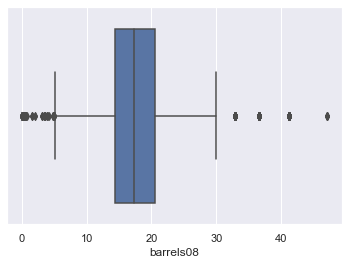

In [88]:
sns.boxplot(df.barrels08)

### 4.1.2 IQR

<AxesSubplot:>

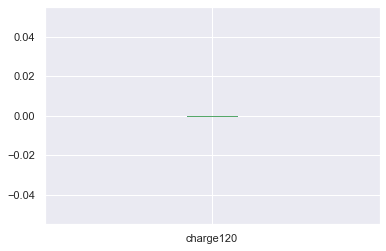

In [89]:
df.charge120.plot.box()

<AxesSubplot:>

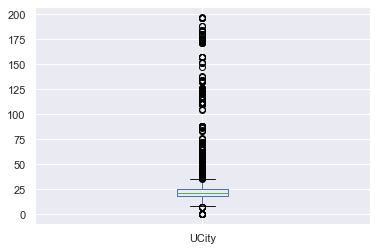

In [90]:
df.UCity.plot.box()

IQR stands for InterQuartile Range

1. Calculate 75%
2. Calculate 25%
3. Calulate difference between #1 - #2 (IQR)
4. Calculate the acceptable range IQR * 1.7
5. Calculate left whisker: #2 - #4
6. Calculate right whisker: #1 - #4
7. Everything that is outside the range(#5 and #6) is outlier


<AxesSubplot:xlabel='barrels08'>

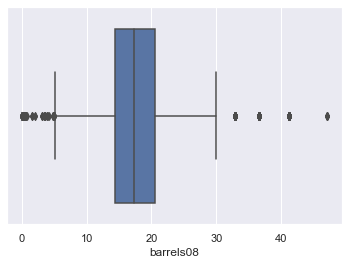

In [92]:
sns.boxplot(df.barrels08)

In [93]:
summary=df.describe().T

In [97]:
summary['IQR']=summary['75%']-summary['25%']
summary['cutoff']=summary.IQR*1.7
summary['left']=summary['25%']-summary['cutoff']
summary['right']=summary['75%']-summary['cutoff']
summary

,count,mean,std,min,25%,50%,75%,max,IQR,cutoff,left,right
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143,6.269755,10.658584,3.672285,9.942041
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667,0.000000,0.000000,0.000000,0.000000
charge120,37843.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000,5.000000,8.500000,6.500000,11.500000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000,0.000000,0.000000,0.000000,0.000000
cityA08,37843.0,0.520149,3.837874,0.00,0.00000,0.000000,0.000000,127.000000,0.000000,0.000000,0.000000,0.000000
cityA08U,37843.0,0.327163,3.542596,0.00,0.00000,0.000000,0.000000,127.093000,0.000000,0.000000,0.000000,0.000000
cityCD,37843.0,0.000406,0.039918,0.00,0.00000,0.000000,0.000000,5.350000,0.000000,0.000000,0.000000,0.000000
cityE,37843.0,0.184790,2.904558,0.00,0.00000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000,0.000000


In [98]:
outliers=pd.DataFrame(columns=df.columns)

In [99]:
outliers

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb


In [100]:
#loop over all the columns to detect outliers in each
for col in summary.index:
    lower=summary.at[col,'left']
    upper=summary.at[col,'right']
    
    result=df.loc[(df[col]<lower) | (df[col]>upper)].copy()
    
    result['Outliers']=col
    
    outliers=outliers.append(result)

In [101]:
outliers.shape

(670046, 84)

In [102]:
df.shape

(37843, 83)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb,Outliers
28805,16.480500,0.0,0.0,0.0,18,17.5691,0,0.0,0.0,0.0,...,Not Applicable,0.0,Not Applicable,Tue May 05 00:00:00 EDT 2015,Fri May 29 00:00:00 EDT 2015,Y,0,0,0,ghgScore
27299,12.207778,0.0,0.0,0.0,24,24.0460,0,0.0,0.0,0.0,...,Not Applicable,0.0,Not Applicable,Mon Apr 07 00:00:00 EDT 2014,Mon May 05 00:00:00 EDT 2014,Y,0,0,0,year
25590,14.982273,0.0,0.0,0.0,19,19.0670,0,0.0,0.0,0.0,...,Not Applicable,0.0,Not Applicable,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,N,0,0,0,highway08U
31065,19.388824,0.0,0.0,0.0,15,0.0000,0,0.0,0.0,0.0,...,Not Applicable,0.0,Not Applicable,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,youSaveSpend
4434,15.695714,0.0,0.0,0.0,18,0.0000,0,0.0,0.0,0.0,...,Not Applicable,0.0,Not Applicable,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0,fuelCost08


### 4.1.3 Z-Score

1. Calulate the mean
2. Calculate the std
3. Calculate lower bound - mean - 3std
4. Calculate upper bound - mean + 3std

In [104]:
summary['left']=summary['mean']-3*summary['std']
summary['right']=summary['mean']+3*summary['std']
summary

,count,mean,std,min,25%,50%,75%,max,IQR,cutoff,left,right
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143,6.269755,10.658584,3.804656,31.260356
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667,0.000000,0.000000,-3.208412,3.640750
charge120,37843.0,0.000000,0.000000,0.00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000,0.000000,0.000000,-1.259411,1.306473
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000,5.000000,8.500000,-2.039690,37.922469
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000,0.000000,0.000000,-24.894724,32.980198
cityA08,37843.0,0.520149,3.837874,0.00,0.00000,0.000000,0.000000,127.000000,0.000000,0.000000,-10.993474,12.033772
cityA08U,37843.0,0.327163,3.542596,0.00,0.00000,0.000000,0.000000,127.093000,0.000000,0.000000,-10.300624,10.954951
cityCD,37843.0,0.000406,0.039918,0.00,0.00000,0.000000,0.000000,5.350000,0.000000,0.000000,-0.119346,0.120159
cityE,37843.0,0.184790,2.904558,0.00,0.00000,0.000000,0.000000,122.000000,0.000000,0.000000,-8.528882,8.898463


In [105]:
#loop over all the columns to detect outliers in each
for col in summary.index:
    lower=summary.at[col,'left']
    upper=summary.at[col,'right']
    
    result=df.loc[(df[col]<lower) | (df[col]>upper)].copy()
    
    result['Outliers']=col
    
    outliers=outliers.append(result)

## 4.2 Fix - Winsorize

<AxesSubplot:>

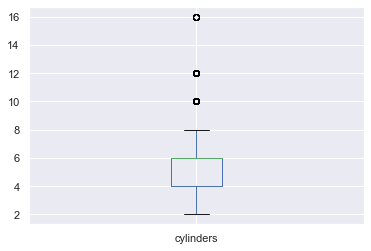

In [107]:
df1=df.copy()

df1.cylinders.plot.box()

<AxesSubplot:>

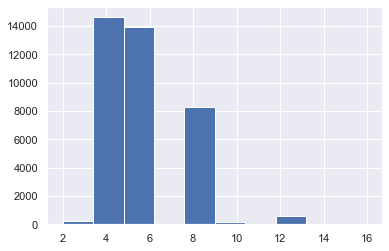

In [108]:
df1.cylinders.hist()

In [109]:
from scipy.stats.mstats import winsorize

In [110]:
winsorize(df1.cylinders, limits=[0.05, 0.05])

masked_array(data=[4., 8., 4., ..., 4., 4., 4.],
             mask=False,
       fill_value=1e+20)